In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

import os

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
path_directorie = '/content/drive/MyDrive/train_images/'
images_train = []
lables = []
len_train = len(train['id_code'])
for i in tqdm(range(len_train)):
    image = os.path.join(path_directorie+str(train['id_code'][i])+'.png')
    image = cv2.imread(image)
    image = cv2.resize(image,(192,192))
    label = train['diagnosis'][i]
    images_train.append(image)
    lables.append(label)

100%|██████████| 3662/3662 [48:19<00:00,  1.26it/s]


In [ ]:
X_train = np.array(images_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
lables=le.fit_transform(lables)

import keras
lables= keras.utils.to_categorical(lables,5)
lables

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
X_train = X_train /255

In [ ]:
X_train =X_train.reshape(-1,192,192,3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train1 , X_valid, Y_train1,Y_valid = train_test_split(X_train , lables, test_size=0.25, random_state=7 )

In [ ]:
X_train , X_test, Y_train,Y_test = train_test_split(X_train1 , Y_train1, test_size=0.25, random_state=7 )

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.regularizers import l2,l1
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import Activation, Convolution2D, Dropout, Conv2D,MaxPool2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D

from keras.layers import SeparableConv2D

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
size = 192

model = Sequential()
model.add(Conv2D(input_shape=(size,size,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))



model.add(MaxPool2D(2,2))

model.add(Conv2D(32 , (3,3)  , activation = 'relu' ))
model.add(MaxPool2D(2,2 ))

model.add(Conv2D(64 , (3,3)  , activation = 'relu' ))
model.add(MaxPool2D((2,2) ))

model.add(Conv2D(128 , (1,1)  , activation = 'relu' ))
model.add(MaxPool2D((2,2) ))



model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(keras.layers.Dropout(0.13))

model.add(Dense(5, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 192, 192, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 96, 96, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 47, 47, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 22, 22, 64)       

In [ ]:
data_generator = keras.preprocessing.image.ImageDataGenerator( zoom_range=0.00005,  # set range for random zoom
        # set mode for filling points outside the input boundaries
        fill_mode='constant',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        rotation_range=180,)


model.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

EPOCHS = 90
BS =256
BATCH_SIZE =32
filepath="/content/drive/MyDrive/weights.best1.hdf5"


checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')


es = EarlyStopping(monitor='val_loss', mode='min', patience=20, restore_best_weights=True, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)

callbacks_list = [checkpoint, es] #early
history = model.fit( data_generator.flow(X_train, Y_train , batch_size=BATCH_SIZE), steps_per_epoch=X_train.shape[0] / BATCH_SIZE,
     epochs=82,
     validation_data=(X_valid,Y_valid),
     callbacks=callbacks_list )

Epoch 1/82
65/64 [==============================] - ETA: -1s - loss: 0.3688 - accuracy: 0.5624
Epoch 1: val_loss improved from inf to 0.28399, saving model to /content/drive/MyDrive/weights.best1.hdf5
64/64 [==============================] - 163s 2s/step - loss: 0.3688 - accuracy: 0.5624 - val_loss: 0.2840 - val_accuracy: 0.6987


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/82
65/64 [==============================] - ETA: -1s - loss: 0.3048 - accuracy: 0.6683
Epoch 2: val_loss did not improve from 0.28399
64/64 [==============================] - 161s 3s/step - loss: 0.3048 - accuracy: 0.6683 - val_loss: 0.2842 - val_accuracy: 0.6812
Epoch 3/82
65/64 [==============================] - ETA: -1s - loss: 0.2895 - accuracy: 0.6863
Epoch 3: val_loss improved from 0.28399 to 0.27221, saving model to /content/drive/MyDrive/weights.best1.hdf5
64/64 [==============================] - 157s 2s/step - loss: 0.2895 - accuracy: 0.6863 - val_loss: 0.2722 - val_accuracy: 0.7074
Epoch 4/82
65/64 [==============================] - ETA: -1s - loss: 0.2800 - accuracy: 0.6950
Epoch 4: val_loss improved from 0.27221 to 0.25133, saving model to /content/drive/MyDrive/weights.best1.hdf5
64/64 [==============================] - 153s 2s/step - loss: 0.2800 - accuracy: 0.6950 - val_loss: 0.2513 - val_accuracy: 0.7424
Epoch 5/82
65/64 [==============================] - ETA: -

22/22 [==============================] - 10s 463ms/step - loss: 0.2265 - accuracy: 0.7613
Acuarcy = 76.13%
Loss = 22.65%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


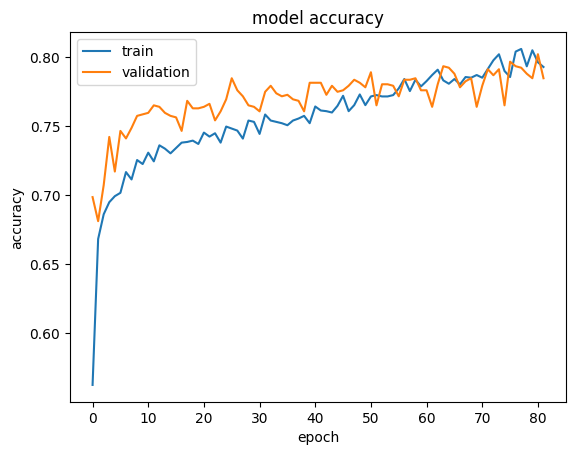

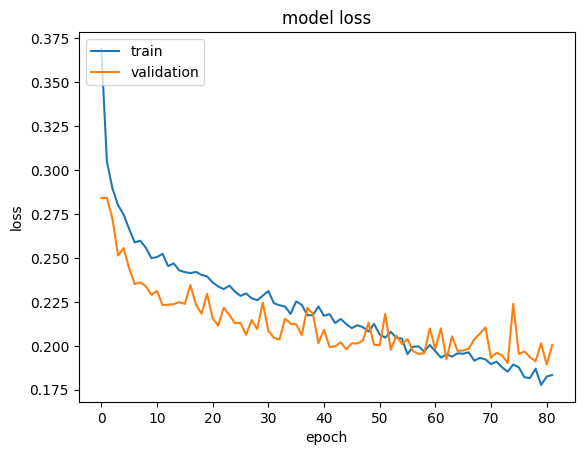

In [ ]:
testModel = model.evaluate(X_test,Y_test)
print("Acuarcy = %.2f%%"%(testModel[1]*100))
print("Loss = %.2f%%"%(testModel[0]*100))
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

22/22 [==============================] - 14s 581ms/step


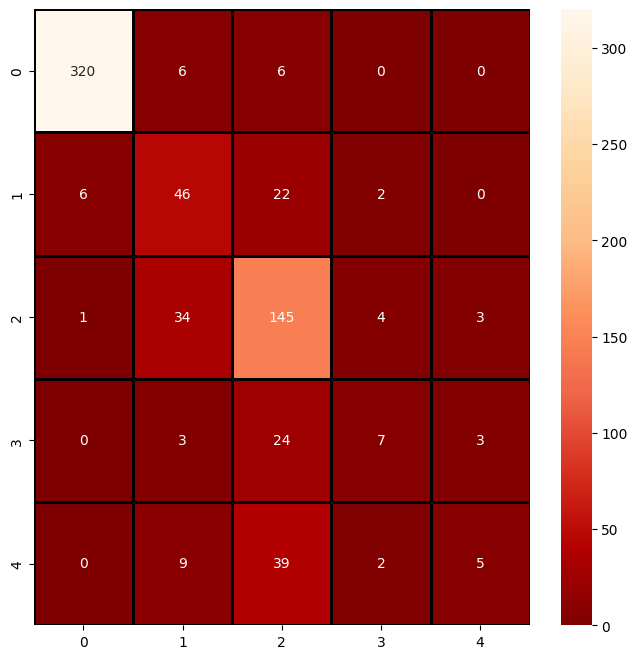

In [ ]:
raw_predictions = model.predict(X_test)
predicted_classes = np.argmax(raw_predictions, axis=1)

rounded_labels = np.argmax(Y_test, axis=1)

confusionMatrix = confusion_matrix(rounded_labels, predicted_classes)
confusionMatrix = pd.DataFrame(confusionMatrix, index=[i for i in range(5) if i != 5], columns=[i for i in range(5) if i != 5])

plt.figure(figsize=(8, 8))
sns.heatmap(confusionMatrix, cmap="OrRd_r", linecolor='black', linewidth=1, annot=True, fmt='')
plt.show()

In [ ]:
rounded_labels = np.argmax(Y_test, axis=1)
target_names = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']
print(classification_report(rounded_labels, predicted_classes, target_names=target_names))

                precision    recall  f1-score   support

         No_DR       0.98      0.96      0.97       332
          Mild       0.47      0.61      0.53        76
      Moderate       0.61      0.78      0.69       187
        Severe       0.47      0.19      0.27        37
Proliferate_DR       0.45      0.09      0.15        55

      accuracy                           0.76       687
     macro avg       0.60      0.52      0.52       687
  weighted avg       0.75      0.76      0.74       687



In [ ]:
class_accuracy = {}
for i, class_name in enumerate(target_names):
    class_idx = i
    class_true_labels = (rounded_labels == class_idx)
    class_predicted_labels = (predicted_classes == class_idx)

    class_acc = np.sum(class_true_labels & class_predicted_labels) / np.sum(class_true_labels)
    class_accuracy[class_name] = class_acc
    print(f"Accuracy for {class_name}: {class_acc * 100:.2f}%")


Accuracy for No_DR: 96.39%
Accuracy for Mild: 60.53%
Accuracy for Moderate: 77.54%
Accuracy for Severe: 18.92%
Accuracy for Proliferate_DR: 9.09%
